## Import Libraries

In [22]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

## Load the Dataset
The Iris dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below loads the iris dataset.

In [23]:
# Load the dataset
df = load_iris()
X = pd.DataFrame(df.data, columns=df.feature_names)
y = pd.Series(df.target)

## Splitting Data into Training and Test Sets

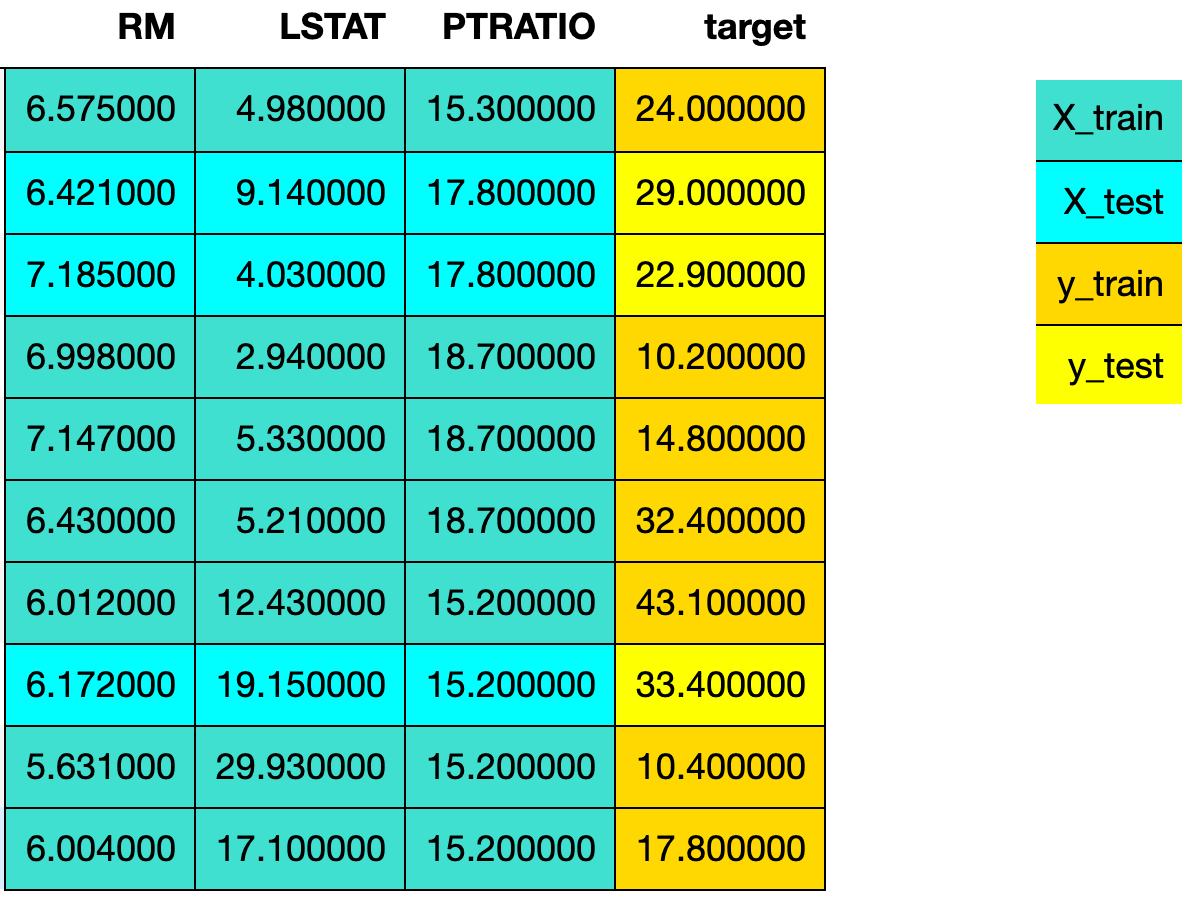
The colors in the image indicate which variable (X_train, X_test, Y_train, Y_test) the data from the dataframe df went to for a particular train test split (not necessarily the exact split of the code below).

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Note, another benefit of Decision Trees is that you don’t have to standardize your features unlike other algorithms like logistic regression and K-Nearest Neighbors. 

## Decision Tree

### Step 1: Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes 

(The modules were imported earlier in the notebook already)

### Step 2: Step 2: Loading and Preparing the Dataset

In [25]:
# Load the dataset
df = load_iris()
X = pd.DataFrame(df.data, columns=df.feature_names)
y = pd.Series(df.target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Step 3: Creating and Configuring the Model

Model is learning the relationship between x (features sepal width, sepal height etc) and y (labels-which species of iris)

In [26]:
# Initialize the model with a specified max_depth
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)

### Step 4: Training the Model

In [27]:
# Train the model
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

## Step 5: Making Predictions and Evaluating Performance

In [28]:
# Make predictions
y_pred = tree_model.predict(X_test)

# Evaluate the model
accuracy = tree_model.score(X_test, y_test)
print(f'Model accuracy: {accuracy:.2f}')

Model accuracy: 1.00


## Measuring Model Performance

While there are other ways of measuring model performance (precision, recall, F1 Score, [ROC Curve](https://towardsdatascience.com/receiver-operating-characteristic-curves-demystified-in-python-bd531a4364d0), etc), we are going to keep this simple and use accuracy as our metric. 
To do this are going to see how the model performs on new data (test set)

Accuracy is defined as:
(fraction of correct predictions): correct predictions / total number of data points

In [29]:
score = clf.score(X_test, y_test)
print(score)

1.0


## Finding the Optimal `max_depth`

In [30]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'max_depth': [2, 3, 4, 5, 6, None]}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f'Best max_depth: {grid_search.best_params_}')

Best max_depth: {'max_depth': 3}


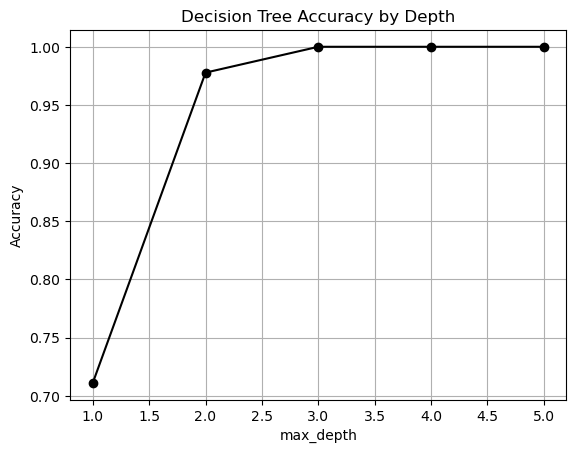

In [33]:
# Visualizing model performance by depth
depths = range(1, 6)
accuracies = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    accuracies.append(acc)

plt.plot(depths, accuracies, marker='o', linestyle='-', color='black')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy by Depth')
plt.grid(True)
plt.show()
